In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
os.chdir("/content/drive/MyDrive/414dataset/")

In [ ]:
#pandas could not read the csv file had to change encoding to 'latin-1' in order to read file
df = pd.read_csv("2020_rws.csv", encoding='latin-1')

In [ ]:
df.head()

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work

In [ ]:
#Standardize columns
df.columns = df.columns.str.replace(r"[^\w\s]", "", regex=True).str.replace(" ", "_").str.lower()

In [ ]:
#check for missing values
missing_values = df.isnull().sum()
print(missing_values)


response_id                                                                                                                                                                                                                                                                                    0
what_year_were_you_born                                                                                                                                                                                                                                                                        0
what_is_your_gender                                                                                                                                                                                                                                                                            0
which_of_the_following_best_describes_your_industry                                                                                  

In [ ]:
df.head()

,response_id,what_year_were_you_born,what_is_your_gender,which_of_the_following_best_describes_your_industry,which_of_the_following_best_describes_your_industry_detailed,which_of_the_following_best_describes_your_current_occupation,which_of_the_following_best_describes_your_current_occupation_detailed,how_many_people_are_currently_employed_by_your_organisation,do_you_manage_people_as_part_of_your_current_occupation,which_of_the_following_best_describes_your_household,...,compare_remote_working_to_working_at_your_employers_workplace_select_the_best_aspect_of_remote_working_for_you__managing_my_family_responsibilities__my_working_relationships__preparing_for_work_and_commuting__managing_my_personal_commitments__my_opportunities_to_socialise__my_mental_wellbeing,compare_remote_working_to_working_at_your_employers_workplace_select_the_worst_aspect_of_remote_working_for_you__managing_my_family_responsibilities__my_working_relationships__preparing_for_work_and_commuting__managing_my_personal_commitments__my_opportunities_to_socialise__my_mental_wellbeing,compare_remote_working_to_working_at_your_employers_workplace_select_the_best_aspect_of_remote_working_for_you__managing_my_family_responsibilities__my_working_relationships__preparing_for_work_and_commuting__my_daily_expenses__my_personal_relationships__my_job_satisfaction,compare_remote_working_to_working_at_your_employers_workplace_select_the_worst_aspect_of_remote_working_for_you__managing_my_family_responsibilities__my_working_relationships__preparing_for_work_and_commuting__my_daily_expenses__my_personal_relationships__my_job_satisfaction,compare_remote_working_to_working_at_your_employers_workplace_select_the_best_aspect_of_remote_working_for_you__the_number_of_hours__i_work__my_worklife_balance__my_onthejob_learning_opportunities__managing_my_personal_commitments__my_opportunities_to_socialise__my_mental_wellbeing,compare_remote_working_to_working_at_your_employers_workplace_select_the_worst_aspect_of_remote_working_for_you__the_number_of_hours__i_work__my_worklife_balance__my_onthejob_learning_opportunities__managing_my_personal_commitments__my_opportunities_to_socialise__my_mental_wellbeing,compare_remote_working_to_working_at_your_employers_workplace_select_the_best_aspect_of_remote_working_for_you__the_number_of_hours__i_work__my_worklife_balance__my_onthejob_learning_opportunities__my_daily_expenses__my_personal_relationships__my_job_satisfaction,compare_remote_working_to_working_at_your_employers_workplace_select_the_worst_aspect_of_remote_working_for_you__the_number_of_hours__i_work__my_worklife_balance__my_onthejob_learning_opportunities__my_daily_expenses__my_personal_relationships__my_job_satisfaction,compare_remote_working_to_working_at_your_employers_workplace_select_the_best_aspect_of_remote_working_for_you__managing_my_personal_commitments__my_opportunities_to_socialise__my_mental_wellbeing__my_daily_expenses__my_personal_relationships__my_job_satisfaction,compare_remote_working_to_working_at_your_employers_workplace_select_the_worst_aspect_of_remote_working_for_you__managing_my_personal_commitments__my_opportunities_to_socialise__my_mental_wellbeing__my_daily_expenses__my_personal_relationships__my_job_satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work and commuting,My working relationships,Preparing for work and commuting,My working relationships,My 

In [ ]:
# Identify numerical columns for outlier detection
num_cols = df.select_dtypes(include=['number']).columns

# Detect outliers using IQR method
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Outlier conditions (values beyond 1.5*IQR)
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()

In [ ]:
print(df.columns)

Index(['response_id', 'what_year_were_you_born', 'what_is_your_gender',
       'which_of_the_following_best_describes_your_industry',
       'which_of_the_following_best_describes_your_industry_detailed',
       'which_of_the_following_best_describes_your_current_occupation',
       'which_of_the_following_best_describes_your_current_occupation_detailed',
       'how_many_people_are_currently_employed_by_your_organisation',
       'do_you_manage_people_as_part_of_your_current_occupation',
       'which_of_the_following_best_describes_your_household',
       'how_long_have_you_been_in_your_current_job', 'metro__regional',
       'thinking_about_your_current_job_how_much_of_your_time_did_you_spend_remote_working_last_year',
       'thinking_about_remote_working_last_year_how_strongly_do_you_agree_or_disagree_with_the_following_statements__my_organisation_encouraged_people_to_work_remotely',
       'thinking_about_remote_working_last_year_how_strongly_do_you_agree_or_disagree_with_the_fol

In [ ]:
del df_filtered
# Define key columns to keep
key_columns = [
    "thinking_about_your_current_job_how_much_of_your_time_did_you_spend_remote_working_in_the_last_3_months",
    "imagine_that_covid19_is_cured_or_eradicated_going_forward_how_much_of_your_time_would_you_prefer_to_work_remotely",
    "thinking_about_remote_working_in_the_last_3_months_how_strongly_do_you_agree_or_disagree_with_the_following_statements__i_could_easily_collaborate_with_colleagues_when_working_remotely",
    "this_question_is_about_your_productivity_productivity_means_what_you_produce_for_each_hour_that_you_work_it_includes_the_amount_of_work_you_achieve_each_hour_and_the_quality_of_your_work_each_hour__\nplease_compare_your_productivity_when_you_work_remotely_to_when_you_work_at_your_employers_workplace__\nroughly_how_productive_are_you_each_hour_when_you_work_remotely",
    "on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__preparing_for_work_and_commuting",
    "on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__personal_and_family_time",
    "on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__working",
    "on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__personal_and_family_time",
    "on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__preparing_for_work_and_commuting",
    "on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__working"
]

# Extract only relevant columns
df_filtered = df[key_columns]

# Show the first few rows
df_filtered.head()


,thinking_about_your_current_job_how_much_of_your_time_did_you_spend_remote_working_in_the_last_3_months,imagine_that_covid19_is_cured_or_eradicated_going_forward_how_much_of_your_time_would_you_prefer_to_work_remotely,thinking_about_remote_working_in_the_last_3_months_how_strongly_do_you_agree_or_disagree_with_the_following_statements__i_could_easily_collaborate_with_colleagues_when_working_remotely,this_question_is_about_your_productivity_productivity_means_what_you_produce_for_each_hour_that_you_work_it_includes_the_amount_of_work_you_achieve_each_hour_and_the_quality_of_your_work_each_hour__\nplease_compare_your_productivity_when_you_work_remotely_to_when_you_work_at_your_employers_workplace__\nroughly_how_productive_are_you_each_hour_when_you_work_remotely,on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__preparing_for_work_and_commuting,on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__personal_and_family_time,on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__working,on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__personal_and_family_time,on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__preparing_for_work_and_commuting,on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__working
0,90%,90%,Somewhat agree,Im 50% more productive when working remotely ...,0.5,3.5,8.0,2.0,2.0,8.0
1,20%,20%,Somewhat agree,Im 20% less productive when working remotely,0.0,3.0,7.0,3.0,2.0,7.0
2,50% - I spent about half of my time remote wor...,60%,Somewhat agree,Im 10% less productive when working remotely,5.0,7.0,2.0,6.0,6.0,1.0
3,100% - I spent all of my time remote working,100% - All of my time,Strongly agree,My productivity is about same when I work remo...,0.0,3.0,9.0,1.0,1.0,9.0
4,90%,60%,Somewhat agree,Im 20% more productive when working remotely,0.0,15.0,6.0,13.0,1.0,8.0


In [ ]:

new_column_names = {
    "thinking_about_your_current_job_how_much_of_your_time_did_you_spend_remote_working_in_the_last_3_months": "current_remote_work_time",
    "imagine_that_covid19_is_cured_or_eradicated_going_forward_how_much_of_your_time_would_you_prefer_to_work_remotely": "preferred_remote_work_time",
    "thinking_about_remote_working_in_the_last_3_months_how_strongly_do_you_agree_or_disagree_with_the_following_statements__i_could_easily_collaborate_with_colleagues_when_working_remotely": "remote_collaboration_ease",
    "this_question_is_about_your_productivity_productivity_means_what_you_produce_for_each_hour_that_you_work_it_includes_the_amount_of_work_you_achieve_each_hour_and_the_quality_of_your_work_each_hour__\nplease_compare_your_productivity_when_you_work_remotely_to_when_you_work_at_your_employers_workplace__\nroughly_how_productive_are_you_each_hour_when_you_work_remotely": "remote_work_productivity",
    "on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__preparing_for_work_and_commuting": "remote_prep_commute_time",
    "on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__personal_and_family_time": "remote_personal_time",
    "on_a_day_when_you_do_remote_work_how_many_hours_would_you_spend_doing_the_following_activities__working": "remote_work_time",
    "on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__personal_and_family_time": "office_personal_time",
    "on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__preparing_for_work_and_commuting": "office_prep_commute_time",
    "on_a_day_when_you_attend_your_employers_workplace_how_many_hours_would_you_spend_doing_the_following_activities__working": "office_work_time"
}

df_filtered = df_filtered.rename(columns=new_column_names)

# Show the first few rows with renamed columns
df_filtered.head()


,current_remote_work_time,preferred_remote_work_time,remote_collaboration_ease,remote_work_productivity,remote_prep_commute_time,remote_personal_time,remote_work_time,office_personal_time,office_prep_commute_time,office_work_time
0,90%,90%,Somewhat agree,Im 50% more productive when working remotely ...,0.5,3.5,8.0,2.0,2.0,8.0
1,20%,20%,Somewhat agree,Im 20% less productive when working remotely,0.0,3.0,7.0,3.0,2.0,7.0
2,50% - I spent about half of my time remote wor...,60%,Somewhat agree,Im 10% less productive when working remotely,5.0,7.0,2.0,6.0,6.0,1.0
3,100% - I spent all of my time remote working,100% - All of my time,Strongly agree,My productivity is about same when I work remo...,0.0,3.0,9.0,1.0,1.0,9.0
4,90%,60%,Somewhat agree,Im 20% more productive when working remotely,0.0,15.0,6.0,13.0,1.0,8.0


In [ ]:
def standardize_data(df):
    # current_remote_work_time - utilized AI in order to figure out how to change the string values into just numerical values
    df['current_remote_work_time'] = df['current_remote_work_time'].astype(str)
    df['current_remote_work_time'] = df['current_remote_work_time'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else None)

    # preferred_remote_work_time - utilized AI in order to figure out how to change the string values into just numerical values
    df['preferred_remote_work_time'] = df['preferred_remote_work_time'].astype(str)
    df['preferred_remote_work_time'] = df['preferred_remote_work_time'].apply(lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else None)

    # remote_collaboration_ease
    mapping = {
        'Strongly disagree': 1,
        'Somewhat disagree': 2,
        'Neither agree nor disagree': 3,
        'Somewhat agree': 4,
        'Strongly agree': 5
    }

    df['remote_collaboration_ease'] = df['remote_collaboration_ease'].map(mapping)

    return df

df_filtered = standardize_data(df_filtered)
df_filtered.head()

,current_remote_work_time,preferred_remote_work_time,remote_collaboration_ease,remote_work_productivity,remote_prep_commute_time,remote_personal_time,remote_work_time,office_personal_time,office_prep_commute_time,office_work_time
0,90.0,90.0,4.0,Im 50% more productive when working remotely ...,0.5,3.5,8.0,2.0,2.0,8.0
1,20.0,20.0,4.0,Im 20% less productive when working remotely,0.0,3.0,7.0,3.0,2.0,7.0
2,50.0,60.0,4.0,Im 10% less productive when working remotely,5.0,7.0,2.0,6.0,6.0,1.0
3,100.0,100.0,5.0,My productivity is about same when I work remo...,0.0,3.0,9.0,1.0,1.0,9.0
4,90.0,60.0,4.0,Im 20% more productive when working remotely,0.0,15.0,6.0,13.0,1.0,8.0


In [ ]:
productivity_mapping = {
    "Im 50% more productive when working remotely (or more)": 1.5,
    "Im 40% more productive when working remotely": 1.4,
    "Im 30% more productive when working remotely": 1.3,
    "Im 20% more productive when working remotely": 1.2,
    "Im 10% more productive when working remotely": 1.1,
    "My productivity is about same when I work remotely": 1.0,
    "Im 10% less productive when working remotely": 0.9,
    "Im 20% less productive when working remotely": 0.8,
    "Im 30% less productive when working remotely": 0.7,
    "Im 40% less productive when working remotely": 0.6,
    "Im 50% less productive when working remotely (or less)": 0.5
}

def standardize_productivity(df):
    df['remote_work_productivity'] = df['remote_work_productivity'].map(productivity_mapping)
    return df

df_filtered = standardize_productivity(df_filtered)
df_filtered.head()


,current_remote_work_time,preferred_remote_work_time,remote_collaboration_ease,remote_work_productivity,remote_prep_commute_time,remote_personal_time,remote_work_time,office_personal_time,office_prep_commute_time,office_work_time
0,90.0,90.0,4.0,1.5,0.5,3.5,8.0,2.0,2.0,8.0
1,20.0,20.0,4.0,0.8,0.0,3.0,7.0,3.0,2.0,7.0
2,50.0,60.0,4.0,0.9,5.0,7.0,2.0,6.0,6.0,1.0
3,100.0,100.0,5.0,1.0,0.0,3.0,9.0,1.0,1.0,9.0
4,90.0,60.0,4.0,1.2,0.0,15.0,6.0,13.0,1.0,8.0


In [ ]:
df_filtered['remote_work_productivity'].value_counts()


,count
remote_work_productivity,
1.0,437
1.5,220
1.2,208
1.3,193
1.1,101
0.9,97
0.8,90
1.4,84
0.7,43


In [ ]:
df_filtered.isnull().sum()

,0
current_remote_work_time,31
preferred_remote_work_time,225
remote_collaboration_ease,31
remote_work_productivity,0
remote_prep_commute_time,0
remote_personal_time,0
remote_work_time,0
office_personal_time,0
office_prep_commute_time,0
office_work_time,0


In [ ]:
df_filtered["current_remote_work_time"].fillna(df_filtered["current_remote_work_time"].median(), inplace=True)
df_filtered["preferred_remote_work_time"].fillna(df_filtered["preferred_remote_work_time"].median(), inplace=True)
df_filtered["remote_collaboration_ease"].fillna(df_filtered["remote_collaboration_ease"].median(), inplace=True)


<ipython-input-99-4cc94159fea2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered["current_remote_work_time"].fillna(df_filtered["current_remote_work_time"].median(), inplace=True)
<ipython-input-99-4cc94159fea2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

In [ ]:
df_filtered.isnull().sum()

,0
current_remote_work_time,0
preferred_remote_work_time,0
remote_collaboration_ease,0
remote_work_productivity,0
remote_prep_commute_time,0
remote_personal_time,0
remote_work_time,0
office_personal_time,0
office_prep_commute_time,0
office_work_time,0


In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Apply function to remove outliers
df_cleaned = remove_outliers(df_filtered)

In [ ]:
summary_stats = df_cleaned.describe()
print(summary_stats)


       current_remote_work_time  preferred_remote_work_time  \
count                899.000000                  899.000000   
mean                  73.248053                   55.317019   
std                   30.941350                   24.869026   
min                   10.000000                   10.000000   
25%                   50.000000                   40.000000   
50%                   90.000000                   50.000000   
75%                  100.000000                   70.000000   
max                  100.000000                  100.000000   

       remote_collaboration_ease  remote_work_productivity  \
count                 899.000000                899.000000   
mean                    4.286986                  1.139711   
std                     0.657285                  0.221134   
min                     3.000000                  0.600000   
25%                     4.000000                  1.000000   
50%                     4.000000                  1.100000  

<ipython-input-107-40a9ff1998b1>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(["Remote Work", "In-Office"])
<ipython-input-107-40a9ff1998b1>:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(["Remote Work", "In-Office"])
<ipython-input-107-40a9ff1998b1>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(["Remote Work", "In-Office"])


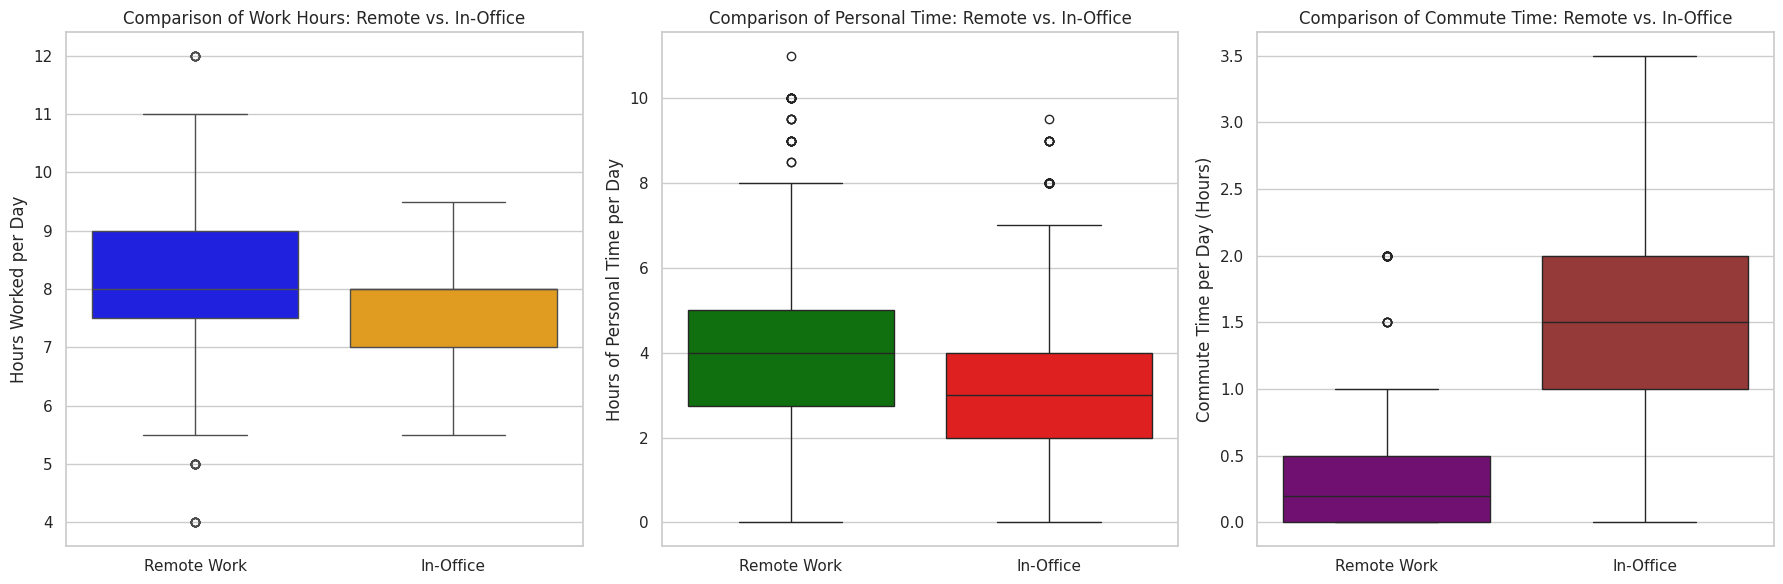

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Set Seaborn style
sns.set(style="whitegrid")

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot: Remote vs. Office Work Hours
sns.boxplot(data=df_cleaned[["remote_work_time", "office_work_time"]], ax=axes[0], palette=["blue", "orange"])
axes[0].set_title("Comparison of Work Hours: Remote vs. In-Office")
axes[0].set_xticklabels(["Remote Work", "In-Office"])
axes[0].set_ylabel("Hours Worked per Day")

# Boxplot: Remote vs. Office Personal Time
sns.boxplot(data=df_cleaned[["remote_personal_time", "office_personal_time"]], ax=axes[1], palette=["green", "red"])
axes[1].set_title("Comparison of Personal Time: Remote vs. In-Office")
axes[1].set_xticklabels(["Remote Work", "In-Office"])
axes[1].set_ylabel("Hours of Personal Time per Day")

# Boxplot: Remote vs. Office Commute Time
sns.boxplot(data=df_cleaned[["remote_prep_commute_time", "office_prep_commute_time"]], ax=axes[2], palette=["purple", "brown"])
axes[2].set_title("Comparison of Commute Time: Remote vs. In-Office")
axes[2].set_xticklabels(["Remote Work", "In-Office"])
axes[2].set_ylabel("Commute Time per Day (Hours)")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


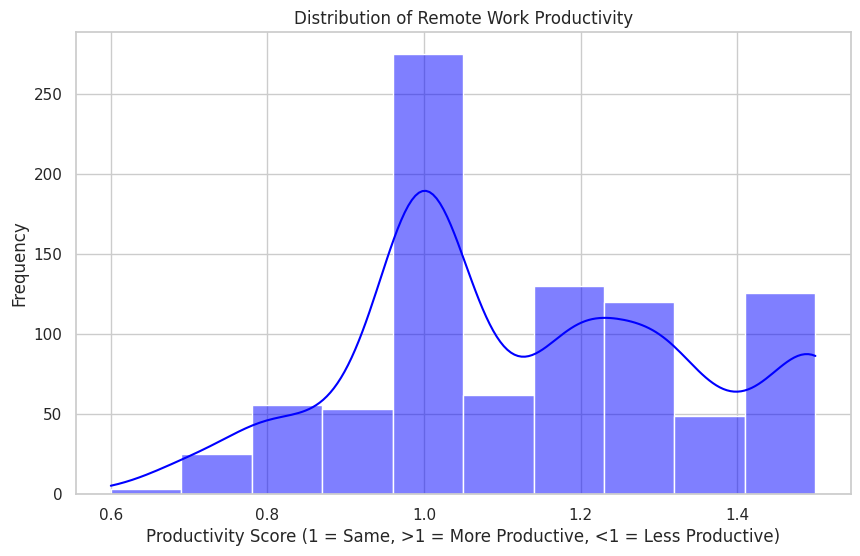

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned["remote_work_productivity"], bins=10, kde=True, color="blue")

plt.xlabel("Productivity Score (1 = Same, >1 = More Productive, <1 = Less Productive)")
plt.ylabel("Frequency")
plt.title("Distribution of Remote Work Productivity")

plt.show()


Shapiro-Wilk Test (Remote Personal Time): p-value = 0.00000
Shapiro-Wilk Test (Office Personal Time): p-value = 0.00000


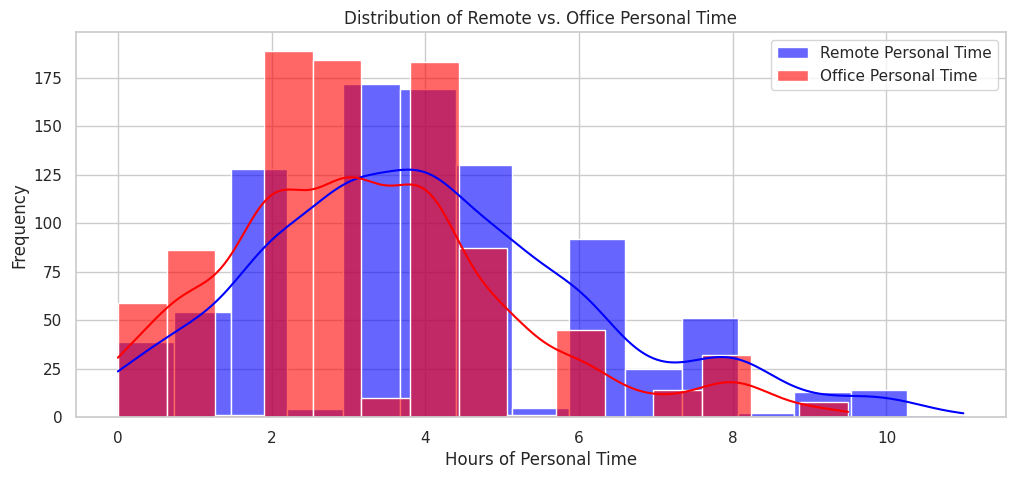

Levene’s Test for Equal Variance: p-value = 0.00011


In [ ]:

import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns




remote_personal_time = df_cleaned["remote_personal_time"]
office_personal_time = df_cleaned["office_personal_time"]

shapiro_remote = stats.shapiro(remote_personal_time)
shapiro_office = stats.shapiro(office_personal_time)

print(f"Shapiro-Wilk Test (Remote Personal Time): p-value = {shapiro_remote.pvalue:.5f}")
print(f"Shapiro-Wilk Test (Office Personal Time): p-value = {shapiro_office.pvalue:.5f}")


plt.figure(figsize=(12,5))
sns.histplot(remote_personal_time, kde=True, color="blue", label="Remote Personal Time", bins=15, alpha=0.6)
sns.histplot(office_personal_time, kde=True, color="red", label="Office Personal Time", bins=15, alpha=0.6)
plt.title("Distribution of Remote vs. Office Personal Time")
plt.xlabel("Hours of Personal Time")
plt.ylabel("Frequency")
plt.legend()
plt.show()


levene_test = stats.levene(remote_personal_time, office_personal_time)

print(f"Levene’s Test for Equal Variance: p-value = {levene_test.pvalue:.5f}")


